# Regresión Logística

En este proyecto, trabajaremos con un conjunto de datos publicitarios falsos, que indica si un usuario de Internet en particular hizo clic en un anuncio. Intentaremos crear un modelo que prediga si harán clic o no en un anuncio, en función de las características de ese usuario.

Este conjunto de datos contiene las siguientes características:

* 'Daily Time Spent on Site': tiempo del consumidor en el sitio en minutos
* 'Age': edad del cliente en años
* 'Area Income': Prom. Ingresos del área geográfica del consumidor
* 'Daily Internet Usage': Prom. minutos al día el consumidor está en internet
* 'Ad Topic Line': título del anuncio
* 'City': Ciudad del consumidor
* 'Male': si el consumidor era o no hombre
* 'Country': País del consumidor
* 'Timestamp': hora en que el consumidor hizo clic en el anuncio o en la ventana cerrada
* 'Clicked on Ad': 0 o 1 indicaron hacer clic en el anuncio

## Importar Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Cargar datos
**Lee el archivo advertising.csv y configúralo en un dataframe llamado ad_data.**

In [2]:
ad_data = pd.read_csv('advertising.csv')

**Valide los datos con head()**

In [3]:
ad_data.head(15)

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                      68.95   35     61833.90                256.09   
1                      80.23   31     68441.85                193.77   
2                      69.47   26     59785.94                236.50   
3                      74.15   29     54806.18                245.89   
4                      68.37   35     73889.99                225.58   
5                      59.99   23     59761.56                226.74   
6                      88.91   33     53852.85                208.36   
7                      66.00   48     24593.33                131.76   
8                      74.53   30     68862.00                221.51   
9                      69.88   20     55642.32                183.82   
10                     47.64   49     45632.51                122.02   
11                     83.07   37     62491.01                230.87   
12                     69.57   48     51636.92                113.12   
13                     79.52   24     51739.63                214.23   
14                     42.95   33     30976.00                143.56   

                                    Ad Topic Line               City  Male  \
0              Cloned 5thgeneration orchestration        Wrightburgh     0   
1              Monitored national standardization          West Jodi     1   
2                Organic bottom-line service-desk           Davidton     0   
3           Triple-buffered reciprocal time-frame     West Terrifurt     1   
4                   Robust logistical utilization       South Manuel     0   
5                 Sharable client-driven software          Jamieberg     1   
6                      Enhanced dedicated support        Brandonstad     0   
7                        Reactive local challenge   Port Jefferybury     1   
8                  Configurable coherent function         West Colin     1   
9              Mandatory homogeneous architecture         Ramirezton     1   
10                 Centralized neutral neural-net    West Brandonton     0   
11  Team-oriented grid-enabled Local Area Network  East Theresashire     1   
12          Centralized content-based focus group     West Katiefurt     1   
13               Synergistic fresh-thinking array         North Tara     0   
14                  Grass-roots coherent extranet       West William     0   

                   Country            Timestamp  Clicked on Ad  
0                  Tunisia  2016-03-27 00:53:11              0  
1                    Nauru  2016-04-04 01:39:02              0  
2               San Marino  2016-03-13 20:35:42              0  
3                    Italy  2016-01-10 02:31:19              0  
4                  Iceland  2016-06-03 03:36:18              0  
5                   Norway  2016-05-19 14:30:17              0  
6                  Myanmar  2016-01-28 20:59:32              0  
7                Australia  2016-03-07 01:40:15              1  
8                  Grenada  2016-04-18 09:33:42              0  
9                    Ghana  2016-07-11 01:42:51              0  
10                   Qatar  2016-03-16 20:19:01              1  
11                 Burundi  2016-05-08 08:10:10              0  
12                   Egypt  2016-06-03 01:14:41              1  
13  Bosnia and Herzegovina  2016-04-20 21:49:22              0  
14                Barbados  2016-03-24 09:31:49              1

**Identifica los valores únicos de country**

In [4]:
count=0
a= ad_data['Country'].unique().tolist()
for dia in a:
    count += 1
count

237

**Continua el análisis del dataframe con las funciones info y describe**

In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
ad_data.describe()

Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage         Male  Clicked on Ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0.000000        0.50000  
75%              218.792500     1.000000        1.00000  
max              269.960000     1.000000        1.00000

## Análisis Exploratorio de Datos (EDA)

¡Usemos Seaborn para explorar los datos!

¡Intenta recrear los grafícos que se muestran a continuación!

**Crea un histograma de "Age"**

Text(0.5, 0, 'Age')

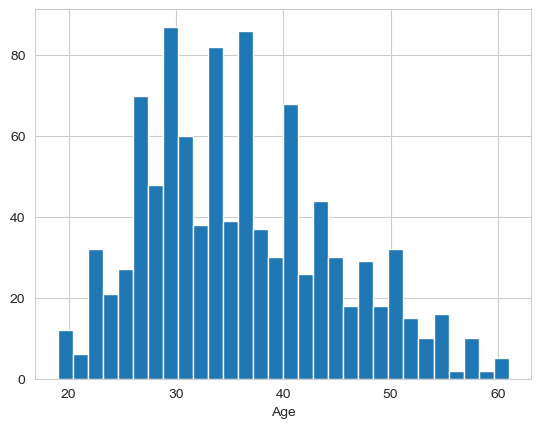

In [7]:
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

**Crea un jointplot que muestre "Area Income" vs. "Age"**

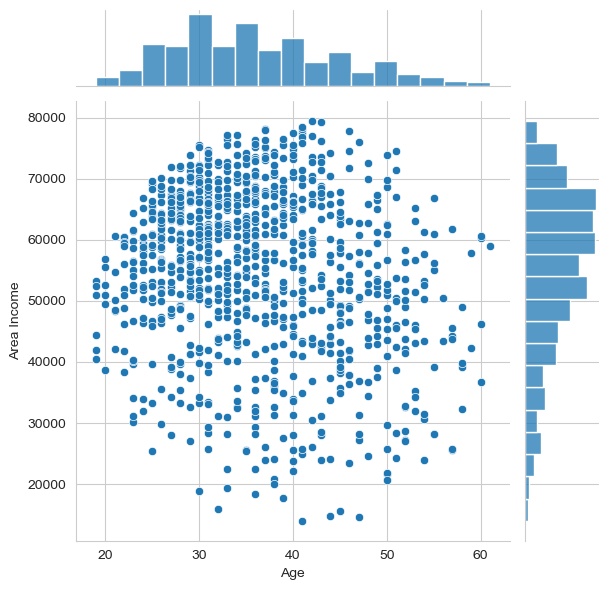

In [8]:
sns.jointplot(x='Age',y='Area Income',data=ad_data)

**Cree un jointplot que muestre la distribución KDE de "Daily Time spent on site" vs. "Age".**

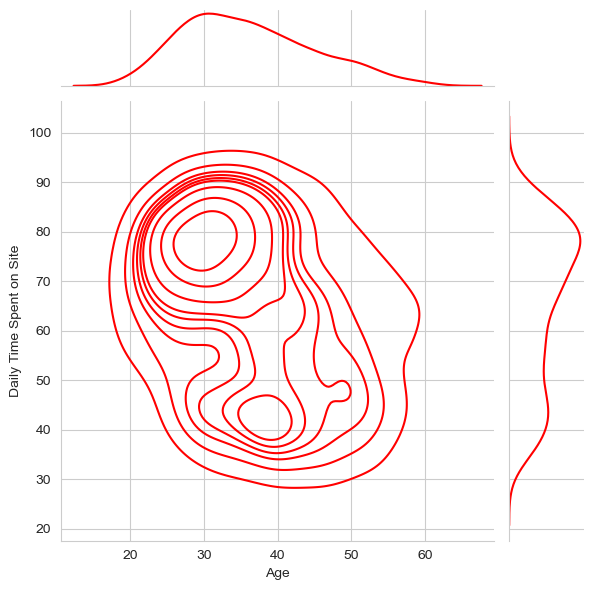

In [9]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,color='red',kind='kde');

**Crea un jointplot que muestre "Daily Time Spent on Site" vs. "Daily Internet Usage"**

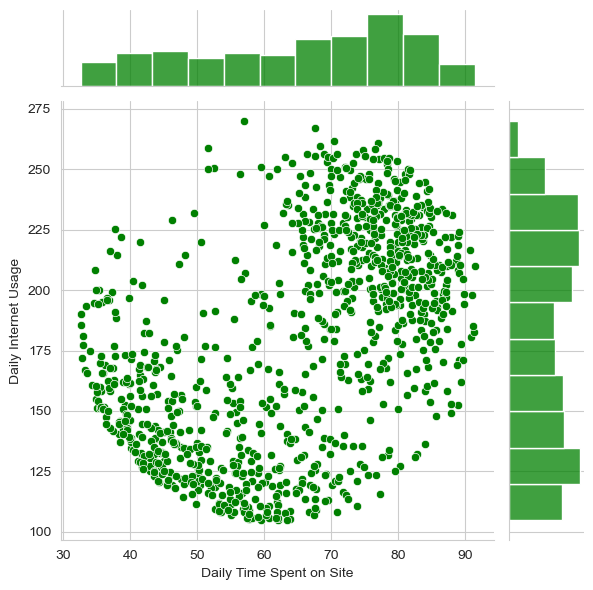

In [10]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data,color='green')

**Finalmente, crea un pairplot con el parámetro 'hue' definido por la característica "Clicked on Ad".**

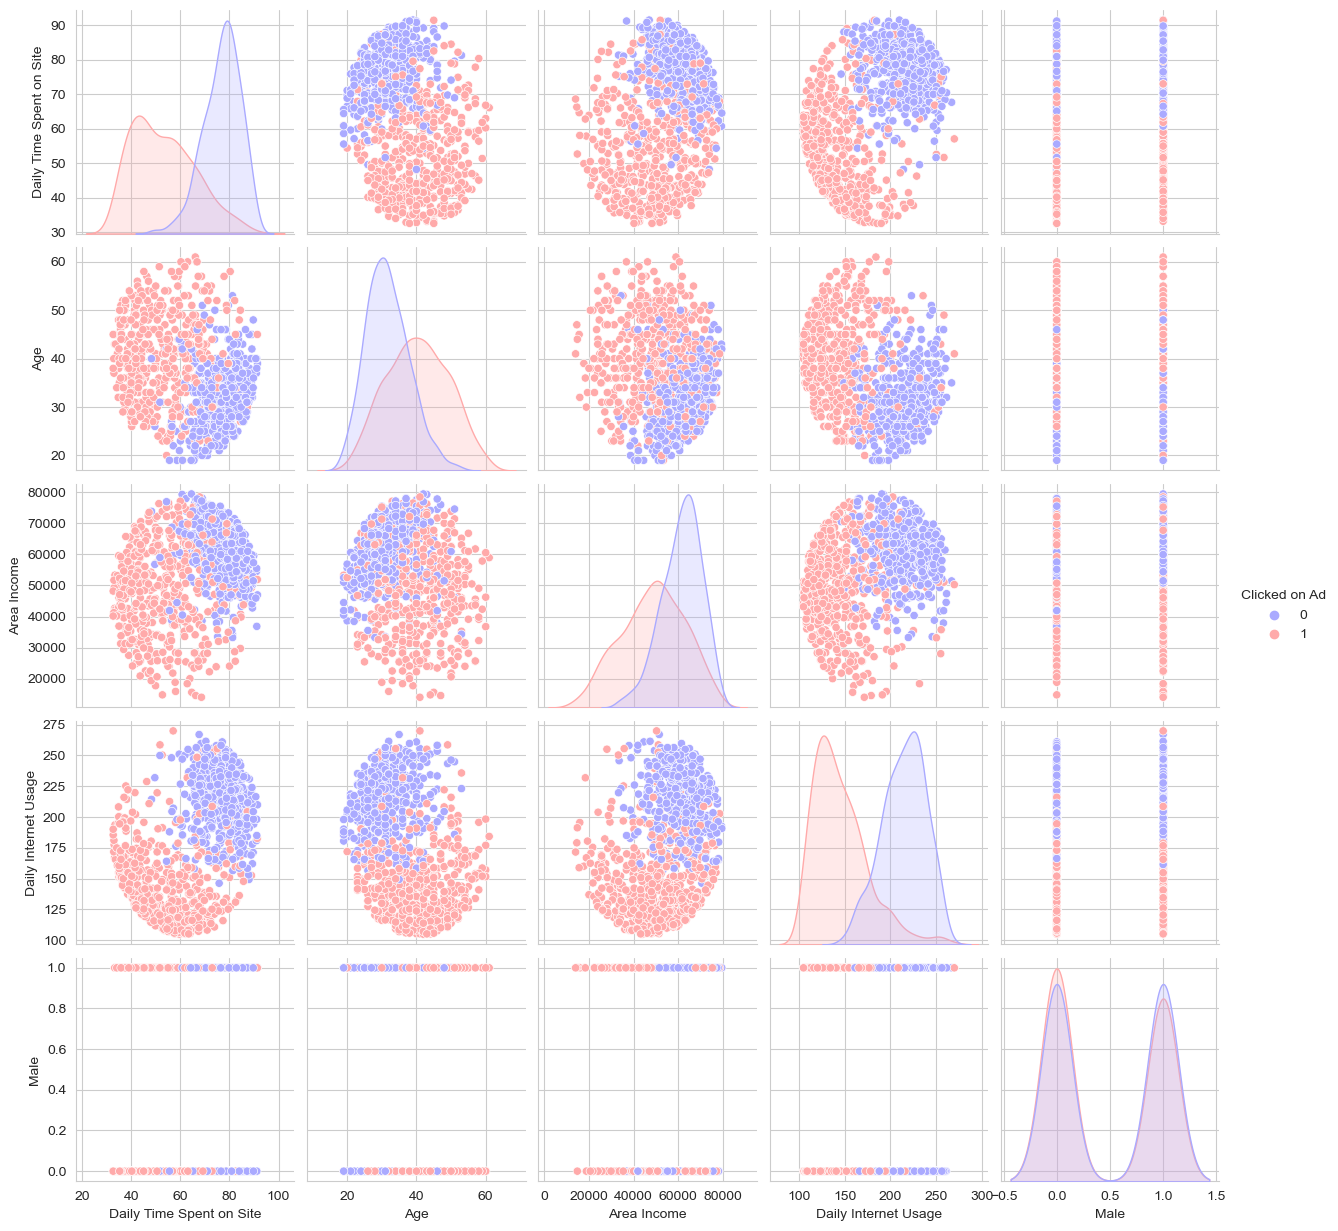

In [11]:
sns.pairplot(ad_data,hue='Clicked on Ad',palette='bwr')

# Inicialicemos el modelo de regresión logística

¡Ahora es el momento de hacer una división del conjunto de datos en entrenamiento y pruebas para nuestro modelo!

¡Tendrás la libertad de elegir las columnas en las que quieras entrenar!

**Divide los datos en un conjunto de entrenamiento y pruebas usando train_test_split**

In [12]:
# Importa la librería
from sklearn.model_selection import train_test_split

In [13]:
# Genera la variable X con las columnas que quieras entrenar y la variable y con "Clicked on Ad"
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [14]:
# Genera los conjuntos de entrenamiento y pruebas, con los parámetros test_size=0.33 y randomstate=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Genera el modelo de Regresión Logística con el conjunto de entrenamiento.**

In [15]:
# Importa la librería
from sklearn.linear_model import LogisticRegression

In [16]:
# Genera el modelo y entrénalo
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

## Predicción y evaluación

**Ahora realiza la predicción de los valores para los datos de prueba.**

In [17]:
predictions = logmodel.predict(X_test)

**Crea un reporte del performance para la clasificación del modelo**

In [18]:
# Importa las librerías
from sklearn.metrics import classification_report

In [19]:
# Imprime el reporte de la clasificación
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



La precision es la relación donde está el número de positivos verdaderos y el número de falsos positivos. La precision es la capacidad del clasificador de no etiquetar como positiva una muestra que es negativa.

tp / (tp + fp) tpfp

El recall es la relación donde está el número de positivos veraderos y el número de falsos negativos. El recall la capacidad del clasificador para encontrar todas las muestras positivas.

tp / (tp + fn) tpfn

El f1-score se puede interpretar como una media armónica ponderada de la precisión y el recall, donde un f1-score alcanza su mejor valor en 1 y el peor puntaje en 0.

El support es el número de ocurrencias de cada clase en y_true.

**Crea la matriz de confusión**

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[156,   6],
       [ 25, 143]], dtype=int64)

## ¡Buen trabajo!